<h1>Feature Engineering</h1>
<hr>

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#import dataset
df=pd.read_csv("project_files/cleaned_listings.csv")

<h1>Co-relations in the dataset</h1>

In [3]:
correlations = df.loc[:, ~df.columns.isin(['id'])].corr()

In [4]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

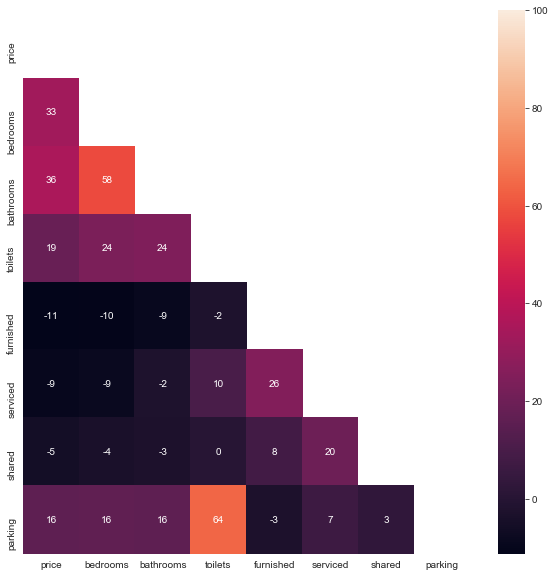

In [5]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [6]:
correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()

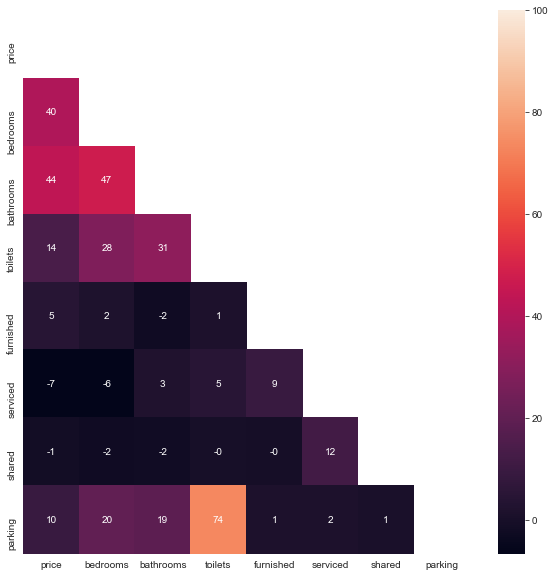

In [7]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [8]:
correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()

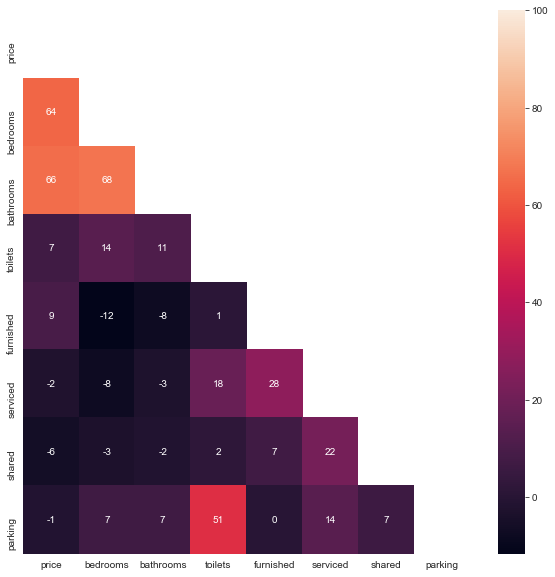

In [9]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [10]:
df.shape

(6918, 15)

In [11]:
#create a value for pre covid years
# df2['pre_covid']=df[(df['listdate'] < '2020-3-12') ].astype(int)
df['pre_covid']=( (df.listdate <= "2020-3-12")).astype(int)

In [13]:
df.sort_values(by='pre_covid').tail(3)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,pre_covid
4505,6707,12800000.0,3,3,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Kilimani,2020-08-24 15:59:02,1
4498,6676,2400000.0,1,1,0.0,0,0,0,0,For Sale,Apartment,Missing,Nairobi,Embakasi,2020-08-24 14:27:48,1
0,7,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2020-07-18 00:00:00,1


In [14]:
df.sort_values(by='pre_covid').head(3)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate,pre_covid
3458,15804,200000.0,4,2,0.0,0,0,0,0,For Rent,House,Missing,Nairobi,Westlands,2022-06-02 12:17:33,0
5021,9084,19000000.0,4,4,4.0,0,0,0,2,For Sale,Apartment,Missing,Nairobi,Kilimani,2021-07-15 16:03:14,0
5020,9082,10000000.0,1,1,1.0,0,0,0,1,For Sale,Apartment,Missing,Nairobi,Kilimani,2021-07-15 14:31:12,0


In [21]:
df.pre_covid.mean()

0.36802544087886674

In [16]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['category', 'type', 'sub_type','state','locality'])

In [18]:
df.head(5)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,listdate,...,locality_Mugumo-Ini (Langata),locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands
0,7,200000.0,5,5,5.0,0,0,0,0,2020-07-18 00:00:00,...,0,1,0,0,0,0,0,0,0,0
1,8,100000.0,3,3,3.0,0,0,0,0,2020-07-18 00:00:00,...,0,0,0,0,0,0,1,0,0,0
2,10,120000.0,3,3,3.0,0,0,0,0,2020-07-18 00:00:00,...,0,0,0,0,0,0,0,0,0,0
3,11,180000.0,2,2,2.0,1,0,0,0,2020-07-18 00:00:00,...,0,0,0,0,0,0,0,0,0,1
4,13,270000.0,4,4,4.0,0,0,0,0,2020-07-18 00:00:00,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = (((df.bedrooms==2) & (df.bathrooms==2))|((df.toilets==2) & (df.bathrooms==2))).astype(int)

In [20]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.1848800231280717

In [23]:
#convert data type listdate to date
df['listdate']= pd.to_datetime(df['listdate'])

In [24]:
df.head()

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,listdate,...,locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands,two_and_two
0,7,200000.0,5,5,5.0,0,0,0,0,2020-07-18,...,1,0,0,0,0,0,0,0,0,0
1,8,100000.0,3,3,3.0,0,0,0,0,2020-07-18,...,0,0,0,0,0,1,0,0,0,0
2,10,120000.0,3,3,3.0,0,0,0,0,2020-07-18,...,0,0,0,0,0,0,0,0,0,0
3,11,180000.0,2,2,2.0,1,0,0,0,2020-07-18,...,0,0,0,0,0,0,0,0,1,1
4,13,270000.0,4,4,4.0,0,0,0,0,2020-07-18,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.dtypes

id                                           int64
price                                      float64
bedrooms                                     int64
bathrooms                                    int64
toilets                                    float64
furnished                                    int64
serviced                                     int64
shared                                       int64
parking                                      int64
listdate                            datetime64[ns]
pre_covid                                    int32
category_For Rent                            uint8
category_For Sale                            uint8
type_Apartment                               uint8
type_House                                   uint8
sub_type_Bedsitter (Single Room)             uint8
sub_type_Block of Flats                      uint8
sub_type_Detached Bungalow                   uint8
sub_type_Detached Duplex                     uint8
sub_type_Mini Flat             

In [28]:
# Save analytical table
df.to_csv('project_files/analytical_table.csv', index = False)